# Building an Equally Weighted Portfolio
This notebook fetches historical monthly closing prices of key financial futures, calculates returns, evaluates an equal-weighted portfolio, and assesses its performance.

## Importing Necessary Libraries
First, we import the required Python libraries for data fetching, manipulation, and visualization.

In [87]:
import yfinance as yf  # Import Yahoo Finance API for fetching market data
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import matplotlib.dates as mdates  # Import date formatting utilities for plots
import matplotlib.ticker as ticker  # Import ticker module for axis formatting
import numpy as np  # Import NumPy for numerical operations

## Defining Financial Assets
We specify the financial futures to analyze, including the S&P 500 E-mini, 10-Year Treasury Note, Gold, and Dollar Index.

In [88]:
tickers = ["ES=F", "ZN=F", "GC=F", "DX=F"]

## Downloading and Preprocessing Data
We fetch historical adjusted closing prices for the selected tickers, forward-fill missing values, and resample the data to obtain monthly closing prices.

In [89]:
prices = yf.download(tickers)["Close"]
prices = prices.ffill().dropna()  # Forward-fill missing values and drop NaNs
prices = prices.resample("ME").last()  # Resample data to get monthly end-of-period prices
print(prices)

[*********************100%***********************]  4 of 4 completed

Ticker            DX=F     ES=F         GC=F        ZN=F
Date                                                    
2000-09-30  113.000000  1454.00   273.600006  100.218803
2000-10-31  116.620003  1440.75   264.899994  100.703102
2000-11-30  115.099998  1321.00   270.100006  102.703102
2000-12-31  109.279999  1327.00   272.000000  104.890602
2001-01-31  110.529999  1373.50   265.600006  105.484398
...                ...      ...          ...         ...
2024-10-31  103.877998  5738.50  2738.300049  110.468750
2024-11-30  105.828003  6051.50  2657.000000  111.015625
2024-12-31  108.295998  5935.75  2629.199951  108.750000
2025-01-31  108.217003  6067.25  2812.500000  108.843750
2025-02-28  108.120003  6090.25  2934.500000  109.390625

[294 rows x 4 columns]


## Calculating Monthly Returns
We compute percentage returns for each asset and remove missing values.

In [90]:
returns = prices.pct_change().dropna()
print(returns)

Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-10-31  0.032035 -0.009113 -0.031798  0.004832
2000-11-30 -0.013034 -0.083116  0.019630  0.019860
2000-12-31 -0.050565  0.004542  0.007034  0.021299
2001-01-31  0.011439  0.035041 -0.023529  0.005661
2001-02-28  0.013300 -0.095741  0.004518  0.008147
...              ...       ...       ...       ...
2024-10-31  0.033396 -0.013028  0.038769 -0.033361
2024-11-30  0.018772  0.054544 -0.029690  0.004950
2024-12-31  0.023321 -0.019127 -0.010463 -0.020408
2025-01-31 -0.000729  0.022154  0.069717  0.000862
2025-02-28 -0.000896  0.003791  0.043378  0.005024

[293 rows x 4 columns]


## Constructing an Equal-Weighted Portfolio
We assume equal weights for all assets and compute the portfolio returns accordingly.

In [91]:
equal_weights = np.ones(len(tickers)) / len(tickers)
equal_weight_returns = returns * equal_weights
equal_weight_portfolio_returns = equal_weight_returns.sum(axis=1)
equal_weight_portfolio_cum_returns = (1 + equal_weight_portfolio_returns).cumprod()
print(equal_weight_returns)

Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-10-31  0.008009 -0.002278 -0.007950  0.001208
2000-11-30 -0.003258 -0.020779  0.004908  0.004965
2000-12-31 -0.012641  0.001136  0.001759  0.005325
2001-01-31  0.002860  0.008760 -0.005882  0.001415
2001-02-28  0.003325 -0.023935  0.001130  0.002037
...              ...       ...       ...       ...
2024-10-31  0.008349 -0.003257  0.009692 -0.008340
2024-11-30  0.004693  0.013636 -0.007422  0.001238
2024-12-31  0.005830 -0.004782 -0.002616 -0.005102
2025-01-31 -0.000182  0.005538  0.017429  0.000216
2025-02-28 -0.000224  0.000948  0.010844  0.001256

[293 rows x 4 columns]


## Computing Performance Metrics for Financial Returns

In this section, we define the `compute_performance` function, which calculates key performance metrics for a given time series of financial returns. This function is essential for evaluating portfolio performance, understanding risk-adjusted returns, and identifying potential risks.

### What This Function Does:
- **Annualized Mean Return**: Computes the expected yearly return based on the average of historical returns.
- **Annualized Volatility**: Measures the standard deviation of returns, scaled to an annual basis.
- **Skewness & Kurtosis**: Assess the distribution of returns to identify asymmetry and extreme tail events.
- **Information Ratio**: Evaluates the return-to-risk tradeoff by comparing excess return over volatility.
- **Cumulative Returns**: Tracks the total compounded growth of an investment over time.
- **Drawdowns & Max Drawdown**: Identifies the worst peak-to-trough decline in portfolio value.
- **Downside Volatility**: Measures risk only from negative returns, giving a more accurate risk assessment.
- **Sortino & Calmar Ratios**: Provide risk-adjusted return measures focusing on downside risk and drawdowns.

These metrics help investors and analysts assess performance, optimize portfolios, and mitigate financial risks.

Next, we implement this function in Python.


In [92]:
def compute_performance(returns, freq):
    """
    Computes key performance metrics for a financial time series.
    
    Args:
        returns (pd.Series): Time series of portfolio returns.
        freq (int): Frequency of returns (e.g., 12 for annualized calculations).
    
    Returns:
        dict: A dictionary containing computed performance metrics.
    """
    annual_mean_return = returns.mean() * freq
    annual_volatility = returns.std() * np.sqrt(freq)
    cumulative_returns = (1 + returns).cumprod()
    drawdowns = (cumulative_returns.cummax() - cumulative_returns) / cumulative_returns.cummax()
    downside_volatility = returns[returns < 0].std() * np.sqrt(freq)

    performance_metrics = {
        "annual_mean_return": annual_mean_return,
        "annual_volatility": annual_volatility,
        "skewness": returns.skew(),
        "kurtosis": returns.kurt(),
        "information_ratio": annual_mean_return / annual_volatility,
        "cumulative_returns": cumulative_returns,
        "drawdowns": drawdowns,
        "max_drawdown": drawdowns.max(),
        "downside_volatility": downside_volatility,
        "sortino_ratio": annual_mean_return / downside_volatility,
        "calmar_ratio": annual_mean_return / drawdowns.max()
    }
    return performance_metrics


In [93]:
# Compute performance metrics
equal_weight_portfolio_metrics = compute_performance(equal_weight_portfolio_returns, 12)



## Displaying Key Performance Metrics

Once we have computed the performance metrics for our financial time series, the next step is to present them in a structured and readable format. This is accomplished using the `print_metrics` function.

### What This Function Does:
- It takes a **dictionary** of computed performance metrics as input.
- **Formats and prints** each key metric in a human-readable way.
- Includes essential statistics such as:
  - **Annualized Mean Return**: The expected return per year.
  - **Annualized Volatility**: A measure of risk based on standard deviation.
  - **Skewness & Kurtosis**: Used to assess the shape of the return distribution.
  - **Information Ratio**: Evaluates the return in relation to risk.
  - **Max Drawdown**: The worst peak-to-trough loss.
  - **Downside Volatility**: Measures only negative return fluctuations.
  - **Sortino & Calmar Ratios**: Provide risk-adjusted return metrics.

By structuring performance data in a clear and concise manner, this function makes it easier to analyze and interpret financial performance.

Next, we call this function to display our portfolio’s key statistics.


In [94]:
def print_metrics(performance_metrics):
    """
    Prints key performance metrics in a readable format.
    
    Args:
        performance_metrics (dict): Dictionary containing performance metrics.
    """
    print(f"Annual Mean Return: {performance_metrics['annual_mean_return']:.1%}")
    print(f"Annual Volatility: {performance_metrics['annual_volatility']:.1%}")
    print(f"Skewness: {performance_metrics['skewness']:.1f}")
    print(f"Kurtosis: {performance_metrics['kurtosis']:.1f}")
    print(f"Information Ratio: {performance_metrics['information_ratio']:.1f}")
    print(f"Max Drawdown: {performance_metrics['max_drawdown']:.1%}")
    print(f"Downside Volatility: {performance_metrics['downside_volatility']:.1%}")
    print(f"Sortino Ratio: {performance_metrics['sortino_ratio']:.1f}")
    print(f"Calmar Ratio: {performance_metrics['calmar_ratio']:.1f}")


In [95]:
# Print performance metrics
print_metrics(equal_weight_portfolio_metrics)



Annual Mean Return: 4.7%
Annual Volatility: 5.2%
Skewness: -0.4
Kurtosis: 1.9
Information Ratio: 0.9
Max Drawdown: 11.0%
Downside Volatility: 3.4%
Sortino Ratio: 1.4
Calmar Ratio: 0.4


## Visualizing Portfolio Performance

After computing and printing the key financial metrics, the next step is to visualize the performance of our portfolio using the `plot_performance` function.

### What This Function Does:
- **Plots cumulative returns**: This line graph shows how the portfolio’s value has grown over time.
- **Tracks cumulative maximum returns**: Helps in visualizing the highest portfolio value achieved historically.
- **Highlights drawdowns**: Indicates periods where the portfolio’s value declined from its peak.
- **Uses clear labeling and formatting**: The chart is designed with gridlines, legends, and axis formatting for better readability.

### Why Visualization Matters:
- It provides **insights into trends and volatility** in portfolio performance.
- Helps **identify major drawdown periods**, which are crucial for risk management.
- Aids in **comparing portfolio returns** with benchmarks or alternative strategies.

Next, we call this function to generate an interactive plot of our portfolio's historical performance.


In [96]:
def plot_performance(performance_metrics):
    """
    Plots cumulative returns and drawdowns over time.
    
    Args:
        performance_metrics (dict): Dictionary containing performance metrics.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(performance_metrics['cumulative_returns'] - 1, label="Cumulative Returns")
    plt.plot(performance_metrics['cumulative_returns'].cummax() - 1, label="Cumulative Max")
    plt.fill_between(
        performance_metrics['drawdowns'].index, 
        -performance_metrics['drawdowns'],
        color="red", 
        alpha=0.3,
        label="Drawdowns"
        )
    plt.grid()
    plt.legend()
    plt.title("Cumulative Returns Over Time")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return / Drawdown")
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xticks(rotation=45)
    plt.show()



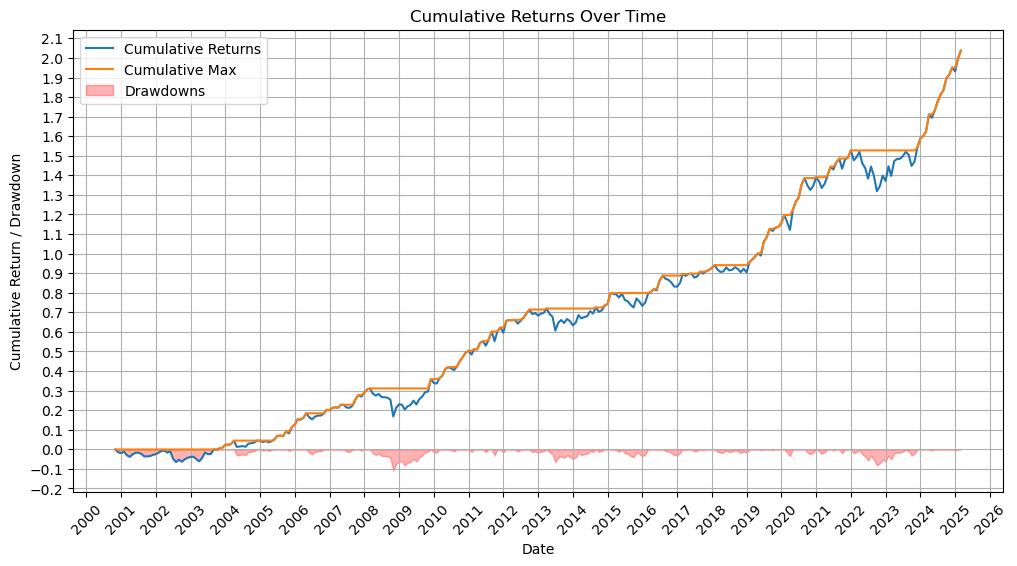

In [97]:
# Plot performance metrics
plot_performance(equal_weight_portfolio_metrics)